## BloomTech Data Science

---


# Linear Regression II
- Overfitting/Underfitting
- Bias/Variance TradeOff
- Train/Test Split
- Multiple Linear Rregrerssion




In [1]:
# Libraries for R^2 visualization
from ipywidgets import interactive, IntSlider, FloatSlider
from math import floor, ceil
from sklearn.base import BaseEstimator, RegressorMixin

# Libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import sys

In [2]:
# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# I. Wrangle Data

In [3]:
def wrangle(filepath):
  # df=pd.read_csv(filepath)

  col_names =['year','incumbent','challenger','income','fatalities','incumbent_vote_share']
  df = pd.read_csv(filepath,
                   header=0,
                   names=col_names,
                   index_col='year')

  # Drop High Cardinality Categorical Columns (HCCs)
  # df.drop(columns=['incumbent', 'challenger'], inplace=True)

  cols_to_drop=[]
  threshold=10

  for col in df:
    if df[col].dtype == 'object':
      if df[col].nunique() > threshold:
        cols_to_drop.append(col)
  print(cols_to_drop)

  df.drop(columns=cols_to_drop, inplace=True)

  return df

df = wrangle(DATA_PATH + 'elections/bread_peace_voting.csv')

['incumbent', 'challenger']


In [4]:
df.head()

,income,fatalities,incumbent_vote_share
year,,,
1952,2.40,190,44.60
1956,2.89,0,57.76
1960,0.85,0,49.91
1964,4.21,1,61.34
1968,3.02,146,49.60


# II. Split Data

**First** we need to split our **target vector** from our **feature matrix**.

In [5]:
# y = df['incumbent_vote_share']
# X = df[['income', 'fatalities']]

In [6]:
# Define our feature X and target y
target = 'incumbent_vote_share'
y = df[target]
X = df.drop(columns=target)

In [7]:
X.shape, y.shape

((17, 2), (17,))

**Second** we need to split our dataset into **training** and **test** sets.

Two strategies:

- Random train-test split using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Generally we use 80% of the data for training, and 20% of the data for testing.
- If you have **timeseries**, then you need to do a "cutoff" split.

In [8]:
# Random train-test-split
# Caution, this function will give you a different random split each time! 
# To avoid this we use the random_state param to give the split a consistent dataset each time, it can be assigned whatever number you want, as long as it is used consistently 

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
# Time-Series train-test-split

cutoff = 2004
mask = X.index < cutoff

# X_train and y_train should be before the cutoff
X_train = X.loc[mask]
y_train = y.loc[mask]

# X_test and y_test should be after the cutoff
X_test = X.loc[~mask]
y_test = y.loc[~mask]


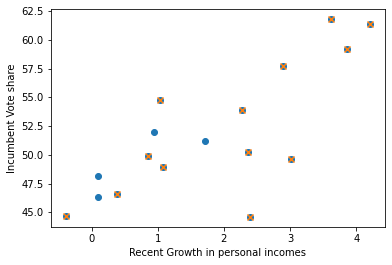

In [10]:
# plotting the data 

plt.scatter(X['income'], y)
plt.scatter(X_train['income'],y_train,marker = 'x')
plt.xlabel('Recent Growth in personal incomes')
plt.ylabel('Incumbent Vote share');

# III. Establish Baseline

In [11]:
y_pred_baseline = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)

print('Mean Vote Share:', y_train.mean())
print('Baseline MAE:',baseline_mae)

Mean Vote Share: 52.56307692307692
Baseline MAE: 5.132544378698224


# IV. Build Model

In [12]:
# Step 1: Import your predictor class
# We did that above ☝️

# Step 2: Instantiate your predictor 
model = LinearRegression()

# Step 3: Fit your model to the TRAINING DATA! 
model.fit(X_train, y_train)

LinearRegression()

# V. Check Metrics

## Mean Absolute Error

The unit of measurement is the same as the unit of measurment for your target (in this case, vote share [%]).

<img src=https://miro.medium.com/max/315/1*OVlFLnMwHDx08PHzqlBDag.gif />

In [13]:
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train)))
print('Test MAE:', mean_absolute_error(y_test, model.predict(X_test)))

# results in very slightly overfit model

Training MAE: 1.3737002516876717
Test MAE: 1.4133453705003944


## Root Mean Squared Error

The unit of measurement is the same as the unit of measurment for your target (in this case, vote share [%]).

<img src= https://miro.medium.com/max/327/1*9hQVcasuwx5ddq_s3MFCyw.gif />

In [14]:
print('Training RMSE:', mean_squared_error(y_train, model.predict(X_train), squared = False))
print('Test RMSE:', mean_squared_error(y_test, model.predict(X_test), squared = False))

Training RMSE: 2.0376005753896838
Test RMSE: 1.623765003537601


## $R^2$ Score

Usually ranges between 0 (bad) and 1 (good).

$r^2 = 1-\frac{(model_{SS})}{(baseline_{SS})}$

<img src=https://miro.medium.com/max/287/1*H3D-sstHHXEPEtZuntFu7Q.png width="250" />

In [ ]:
# Training RMSE
print("R-Squared:", )
# Test RMSE
print("R-Squared:", )

In [ ]:
# Training RMSE
print("R-Squared:", )
# Test RMSE
print("R-Squared:", )

In [ ]:
class BruteForceRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, m=0, b=0):
        self.m = m
        self.b = b
        self.mean = 0
        
    def fit(self, X, y):
        self.mean = np.mean(y)
        return self
    
    def predict(self, X, return_mean=True):
        if return_mean:
            return [self.mean] * len(X)
        else:
            return X * self.m + self.b

def plot(slope, intercept):
    # Assign data to variables
    x = df['income']
    y = df['incumbent_vote_share']
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    
    # Set ax limits
    mar = 0.2
    x_lim = floor(x.min() - x.min()*mar), ceil(x.max() + x.min()*mar)
    y_lim = floor(y.min() - y.min()*mar), ceil(y.max() + y.min()*mar)
    
    # Instantiate and train model
    bfr = BruteForceRegressor(slope, intercept)
    bfr.fit(x, y)
    
    # ax1   
    ## Plot data
    ax1.set_xlim(x_lim)
    ax1.set_ylim(y_lim)
    ax1.scatter(x, y)
    
    ## Plot base model
    ax1.axhline(bfr.mean, color='orange', label='baseline model')
    
    ## Plot residual lines
    y_base_pred = bfr.predict(x)
    ss_base = mean_squared_error(y, y_base_pred) * len(y)
    for x_i, y_i, yp_i in zip(x, y, y_base_pred):
        ax1.plot([x_i, x_i], [y_i, yp_i], 
                 color='gray', linestyle='--', alpha=0.75)
    
    ## Formatting
    ax1.legend()
    ax1.set_title(f'Sum of Squares: {np.round(ss_base, 2)}')
    ax1.set_xlabel('Growth in Personal Incomes')
    ax1.set_ylabel('Incumbent Party Vote Share [%]')

    # ax2

    ax2.set_xlim(x_lim)
    ax2.set_ylim(y_lim)
    ## Plot data
    ax2.scatter(x, y)
    
    ## Plot model
    x_model = np.linspace(*ax2.get_xlim(), 10)
    y_model = bfr.predict(x_model, return_mean=False)
    ax2.plot(x_model, y_model, color='green', label='our model')
    for x_coord, y_coord in zip(x, y):
        ax2.plot([x_coord, x_coord], [y_coord, x_coord * slope + intercept], 
                 color='gray', linestyle='--', alpha=0.75)   
    
    ss_ours = mean_squared_error(y, bfr.predict(x, return_mean=False)) * len(y)
    
    ## Formatting
    ax2.legend()
    ax2.set_title(f'Sum of Squares: {np.round(ss_ours, 2)}')
    ax2.set_xlabel('Growth in Personal Incomes')
    ax2.set_ylabel('Incumbent Party Vote Share [%]')

y = df['incumbent_vote_share']
slope_slider = FloatSlider(min=-5, max=5, step=0.5, value=0)
intercept_slider = FloatSlider(min=int(y.min()), max=y.max(), step=2, value=y.mean())
    
interactive(plot, slope=slope_slider, intercept=intercept_slider)

In [ ]:
# r2 = 1 - (model_SS_error)/ (baseline_SS_error)

In [ ]:
# model better than baseline

In [ ]:
# model equal to baseline

In [ ]:
# model worse than baseline

# VI. Communicate Results

**Challenge:** How can we find the coefficients and intercept for our `model`?

In [ ]:
print('The coefficient for income is:',) 
print('The coefficient for fatalities is:',)

In [ ]:
print('The interecept of our model is:',)